# ANALISIS EXPLORATORIO DE LOS DATOS (EDA)

### Importacion de librerias

In [27]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns
import math
import time
from IPython.display import display

import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  RobustScaler

import warnings
warnings.filterwarnings('ignore')

### Introduccion y carga del dataset

Localizacion del dataset en Kaggle:

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

El dataset contiene transacciones realizadas mediante tarjeta de credito efectuadas en el lapso de dos dias de Septiembre de 2013, por sus titulares de procedencia europea. Se desconoce en que dias se hizo la toma de datos, esto es, si son dias laborables o festivos, o de fin de semana, con las implicaciones en cuanto a uso que ello pueda implicar.

La estructura general del dataset se muestra a continuacion. Pueden distinguirse los siguientes elementos.


*Time*: Recoge el momento en que se efectua la operacion. Se expresa en segundos transcurridos desde que se efectuo la anterior.

*Caracteristicas*: Comprende las variables denominadas V1 a V28, dichas variables se encuentran anonimizadas mediente PCA, para preservar datos sensibles de la naturaleza de la operacion.

*Amount*: Expresa el importe de la operacion expresada en euros.

*Class*: Es la variable dependiente de tipo dicotomico que recoge la informacion sobre la legitimidad o no de la operacion.

      0.- Autentica o legitima.
      1.- Fraude.



In [28]:
df = pd.read_csv('creditcard.csv')

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


### RESUMEN MEDIDAS

In [30]:
authentic, fraud = np.bincount (df['Class'])

total = authentic + fraud 

print ("El dataset se compone de {} registros o columnas y {} variables. "
       .format(df.shape[0],df.shape[1]))
print("Tenemos {} operaciones legitimas o autenticas que suponen el {}% del total"
      .format(authentic, round(100 * authentic / total,2)))
print("Tenemos {} operaciones fraudulentas que suponen el {}% del total"
      .format(fraud,round( 100 * fraud / total,2)))

El dataset se compone de 284807 registros o columnas y 31 variables. 
Tenemos 284315 operaciones legitimas o autenticas que suponen el 99.83% del total
Tenemos 492 operaciones fraudulentas que suponen el 0.17% del total


### COMPROBACION DE VALORES NULOS 

In [31]:
null_counts_dic = df.isnull().sum().to_dict()
print(null_counts_dic )

{'Time': 0, 'V1': 0, 'V2': 0, 'V3': 0, 'V4': 0, 'V5': 0, 'V6': 0, 'V7': 0, 'V8': 0, 'V9': 0, 'V10': 0, 'V11': 0, 'V12': 0, 'V13': 0, 'V14': 0, 'V15': 0, 'V16': 0, 'V17': 0, 'V18': 0, 'V19': 0, 'V20': 0, 'V21': 0, 'V22': 0, 'V23': 0, 'V24': 0, 'V25': 0, 'V26': 0, 'V27': 0, 'V28': 0, 'Amount': 0, 'Class': 0}


El dataset presenta dos caracteristicas definitorias, en las variables de caracteristicas V1-V28 y Amount:

- Elevado sesgo (skewness) de las variables de caracteristicas.

- Alta cantidad de outliers.

A continuacion se procede a argumentar ambas aseveraciones y las decisiones a implementar en consecuencia.


**1.-Elevado sesgo:**

Se considera que una variable presenta un alto apuntamiento cuando este supera el valor de +/- 1. A continuacion se muestra un dataframe con las variables que registran skewness y el valor del mismo.


In [32]:
excluded_columns = ['Time', 'Class']

features_columns = df.loc[:, ~df.columns.isin(excluded_columns)]
var = features_columns.columns

skew_list = []

for i in var:
    skewness = features_columns[i].skew()
    skew_list.append({'Features': i, 'Skewness': skewness})

skew_df = pd.DataFrame(skew_list)
skewed = skew_df.loc[(skew_df["Skewness"] > 1) | (skew_df["Skewness"] < -1)]
skewed['Skewness'] = skewed['Skewness'].round(2)

skewed  = skewed.drop(28)
skewed = skewed.sort_values(by = 'Skewness').reset_index(drop = True)

skewed_transposed = skewed.set_index('Features').transpose()
skewed_transposed = skewed_transposed.reset_index()
skewed_transposed.columns.name = None
skewed_transposed.rename(columns={'index': 'Features'}, inplace=True)
skewed_transposed

,Features,V8,V23,V2,V17,V1,V5,V12,V3,V20,V14,V27,V16,V10,V6,V7,V21,V28
0,Skewness,-8.52,-5.88,-4.62,-3.84,-3.28,-2.43,-2.28,-2.24,-2.04,-2.0,-1.17,-1.1,1.19,1.83,2.55,3.59,11.19


**La cuestion del sesgo skewness es importante en el analisis de algoritmos que se va a efectuar.**

En la **Regresion Logistica**, el sesgo pueden afectar la relacion lineal de las variables y tener un impacto en el rendimiento del modelo. Razon por la que pueden considerarse transformaciones para regularizar los datos.

El modelo **XGBoost** es robusto frente a variables sesgadas y no requiere transformacion de las variables salvo que este sesgos sea elevado. 

El caso del **Random Forest** es similar al anterior, el sesgo tiene un impacto menor que en otros modelos salvo que este sea elevado  en cuyo caso la calidad de de las divisiones realizadas por los arboles si que podria verse afectada, comprometiendo asi el rendimiento del modelo.

Por ultimo, en el caso de los **Arboles de Decision** el sesgo, como en el caso anterior influye si es elevado en como se hacen las divisiones en el arbol y por tanto en las predicciones del mismo.

El dataset oscila entre un valor V8 = - 8.52 y V27 = 11.19, razon por la cual se aplicara transformacion y se empleara en todos los modelos.

Por todas las razones expuestas tras la division del dataset en conjunto de entrenamiento y test, se sometera al mismo a una transformacion de tipo Power Transformation que incorpora el paquete sklearn y que tiene como mision proporcionar a las distribuciones de las variables de una forma mas simetrica asimilable a una normal.

Esta Power Transformation tiene dos posibles aplicaciones:

    - Transformacion Box-Cox, la cual consiste en encontrar el valor optimo del parametro lambda para maximizar la
    normalidad de los datos.
    
    - Transformacion Yeo-Johnson similar a la anterior pero que es mas flexible puesto que permite su aplicacion a variables que incluyen datos negativos. Sera la que se emplee ya que es el caso de este dataset y evita hacer transformaciones adicionales.

En este punto es procedente comentar, que dado que las variables de caracteristicas V1-V28 se encuentran anonimizadas se procede tambien a regularizar la variable **Amount** que presenta un sesgo muy importante previo a la division del dataset


**2.- Tratamiento de los outliers:**

Empleando la tecnica de Tukey´s se considera outlier todos aquellos valores que excedan Q1 - 1.5IQR y Q3 + 1.5IQR. Donde Q1 y Q3 son los cuantiles 1 y 3 respectivamente IQR el recorrido intercuartilico entre ambos.

Bajo este criterio tenemos:


In [33]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [34]:
numeric_columns = (list(df.loc[:, 'V1':'Amount']))
# detecting outliers
Outliers_IQR = IQR_method(df,1,numeric_columns)

# dropping outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 31904


In [35]:
# Obtener los totales y porcentajes del dataset original
authentic, fraud = np.bincount(df['Class'])
total = authentic + fraud
percentage_original = 100 * authentic / total

# Obtener los totales y porcentajes del dataset sin outliers
authentic_out, fraud_out = np.bincount(df_out['Class'])
total_out = authentic_out + fraud_out
percentage_outliers = 100 * authentic_out / total_out

perc_authentic =  round(100 * authentic / total,2)
perc_authentic_out = round(100 * authentic_out / total_out,2)

perc_fraud = round(100 * fraud / total,2)
perc_frauc_out = round(100 * fraud_out / total_out,2)

percentage_original_total = round(percentage_original + perc_fraud,2)
percentage_outliers_total = round(percentage_outliers + perc_frauc_out,2)

# Crear un DataFrame con los resultados
data = {
    'Labels': ['Original', '% Ori', 'No_Outliers', '% No_O'],
    'Authentic': [authentic, perc_authentic, authentic_out, perc_authentic_out],
    'Fraud': [fraud, perc_fraud , fraud_out, perc_frauc_out],
    'TOTAL': [total, percentage_original_total, total_out, percentage_outliers_total]
}

df_result = pd.DataFrame(data)

df_result = df_result .set_index('Labels').transpose()
df_result

Labels,Original,% Ori,No_Outliers,% No_O
Authentic,284315.0,99.83,203351.0,99.99
Fraud,492.0,0.17,26.0,0.01
TOTAL,284807.0,100.00,203377.0,100.00


Como puede apreciarse no hay forma de eliminar los outliers sin eliminar la clase fraude casi al completo.

No es posible efectuar actuacion alguna sobre los outliers sin desequilibrar aun mas el dataset.

Analizadas las peculiaridades del dataset y las actuaciones a llevar a cabo se procede al analisis de las variables en bloques:

* Time.
* Variable caracteristica V1-V28.
* Amount.
* Class.

## Variable Time.

Como se ha mencionado anteriormente el dataset recoge las operaciones efectuadas en el lapso de dos dias de Septiembre de 2013 y expresadas en segundos.

Gracias a eso es posible reconstruir las operaciones efectuadas en esos dias por horas dividiendo entre 3600.

In [36]:
# Copy of df to analize Time data.
timeAnalysis = df[['Time', 'Amount', 'Class']].copy()

# Convert to hour format
timeAnalysis['Time'] = timeAnalysis['Time'].apply(lambda sec : (sec/3600))

# Calculating hour of the day
timeAnalysis['Hour'] = timeAnalysis['Time']%24   # 2 days of data
timeAnalysis['Hour'] = timeAnalysis['Hour'].apply(lambda x : math.floor(x))

# Calculating First and Second day
timeAnalysis['Day'] = timeAnalysis['Time']/24   # 2 days of data
timeAnalysis['Day'] = timeAnalysis['Day'].apply(lambda x : 1 if(x==0) else math.ceil(x))

# Reorder
timeAnalysis[['Time','Hour','Day','Amount','Class']]

# Calculate total of type operation by day.

# Fraud Transactions.
dayFrdTranTotal = timeAnalysis[(timeAnalysis['Class'] == 1)]['Day'].value_counts()

# Authentic Transactions.
dayGenuTran = timeAnalysis[(timeAnalysis['Class'] == 0)]['Day'].value_counts()

# Calculating total transaction daywise
dayTran =  timeAnalysis['Day'].value_counts()

# Create DataFrame for every class by day:
dayFrdTranTotal = timeAnalysis[timeAnalysis['Class'] == 1]['Day'].value_counts().reset_index().rename(columns={'index': 'Day', 'Day': 'Fraud'})
dayGenuTran = timeAnalysis[timeAnalysis['Class'] == 0]['Day'].value_counts().reset_index().rename(columns={'index': 'Day', 'Day': 'Authentic'})
dayTran = timeAnalysis['Day'].value_counts().reset_index().rename(columns={'index': 'Day', 'Day': 'Total'})

# Join dataframes
total_by_day = dayFrdTranTotal.merge(dayGenuTran, on='Day', how='outer').merge(dayTran, on='Day', how='outer')

# Add column percentage fraud operations
total_by_day['% Fraud'] = round((total_by_day['Fraud'] / total_by_day['Total']) * 100,2)

print ('CUADRO RESUMEN DE OPERACIONES POR DIAS:\n')
# Show resultant DataFrame
total_by_day

CUADRO RESUMEN DE OPERACIONES POR DIAS:



,Day,Fraud,Authentic,Total,% Fraud
0,1,281,144506,144787,0.19
1,2,211,139809,140020,0.15


Como puede verse en la tabla tenemos un total de 492 operaciones fraudulentas que se reparten de forma equitativa entre los dos dias no hay un desequilibrio muy elevado entre ambos dias. Puede comprobarse en el siguiente grafico.

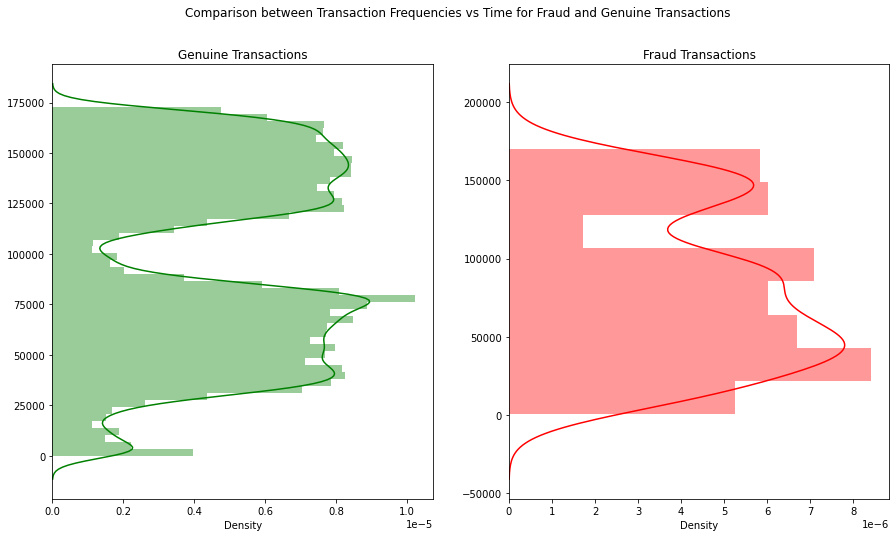

In [37]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

sns.distplot(df[df['Class'] == 0]['Time'].values, color='green', ax=axs[0], vertical=True)
axs[0].set_title('Genuine Transactions')

sns.distplot(df[df['Class'] == 1]['Time'].values, color='red', ax=axs[1], vertical=True)
axs[1].set_title('Fraud Transactions')

fig.suptitle('Comparison between Transaction Frequencies vs Time for Fraud and Genuine Transactions')
plt.show()

A continuacion se muestra la distribucion de operaciones por hora para cada uno de los dias que componen el dataframe.

Para facilitar la visualizacion se han pareado los dataframe lo que facilita visualizar mejor la franjas horarias.

Asimismo se ha añadido una columna denominada '% fraud' que recoge la proporcion de operaciones fraudulentas por franja horaria.

Puesto que la media de operaciones fraudulentas se encuentra en un 0.17 %, se incorpora una ultima columna denominada 'Clasif' de tal manera que si:

* el valor de las operaciones fraudulentas de esa franja horaria es inferior a la media nos devolvera el valor 'Below'.

* si el numero de fraudelentas esta entre la media y su doble, esto es 0.17 y 0.34 % devolvera 'Above'

* en caso de que supere el valor de 0.35 % tendremos una lectura 'Extreme'

De este modo detectamos un patron bastante evidente entre las 2 am y 7 am mientras los titulares de las tarjetas estan presumiblemente dormidos, se produce un incremento bastante significativo de las operaciones fraudulentas


In [38]:
# Create DataFrame for every class by day and hour
dayHourFrdTranTotal = timeAnalysis[timeAnalysis['Class'] == 1].groupby(['Day', 'Hour']).size().reset_index(name='Fraud')
dayHourGenuTran = timeAnalysis[timeAnalysis['Class'] == 0].groupby(['Day', 'Hour']).size().reset_index(name='Authentic')
dayHourTran = timeAnalysis.groupby(['Day', 'Hour']).size().reset_index(name='Total')

# Join DataFrames by 'Day' and 'Hour'
total_by_day_hour = dayHourFrdTranTotal.merge(dayHourGenuTran, on=['Day', 'Hour'], how='outer').merge(dayHourTran, on=['Day', 'Hour'], how='outer')

# Sort DataFrame by 'Day' and 'Hour'
total_by_day_hour = total_by_day_hour.sort_values(['Day', 'Hour'])

# Fill Na with zero
total_by_day_hour['Fraud'] = total_by_day_hour['Fraud'].fillna(0)

# Add column percentage fraud operations
total_by_day_hour['% Fraud'] = round((total_by_day_hour['Fraud'] / total_by_day_hour['Total']) * 100,2)

# Función para asignar la clasificación según el valor de '% Fraud'
def classify_fraud_percentage(fraud_percentage):
    if fraud_percentage <= 0.17:
        return 'Below'  # Below Media
    elif fraud_percentage < 0.35:
        return 'Above' # Above Media
    else:
        return 'Extreme' # Extreme Value

# Aplicar la función a la columna '% Fraud' y asignar el resultado a la columna 'Clasif'
total_by_day_hour['Clasif'] = total_by_day_hour['% Fraud'].apply(classify_fraud_percentage)
total_by_day_hour.reset_index()
# Mostrar el DataFrame resultante
total_by_day_hour

# Dividimos el data
total_day_1 = total_by_day_hour.loc[:23]

total_day_2 = total_by_day_hour.loc[24:]
total_day_2 =  total_day_2.reset_index()

# Combinar los DataFrames horizontalmente
df_combined = pd.concat([total_day_1, total_day_2], axis=1)

# Crear un MultiIndex para las columnas
columns = pd.MultiIndex.from_product([['Day 1'], total_day_1.columns]).append(pd.MultiIndex.from_product([['Day 2'], total_day_2.columns]))

# Asignar el MultiIndex a las columnas del DataFrame combinado
df_combined.columns = columns

# Crear una línea de división entre el día 1 y el día 2
df_combined.insert(len(total_day_1.columns), '#', '#')
df_combined.drop(('Day 2', 'index'), axis=1, inplace=True)


# Crear un estilo para resaltar los índices superiores
idx_style = pd.IndexSlice[:, :]
index_style = [{'selector': idx_style, 'props': [('background-color', 'darkblue'), ('color', 'white')]}]

# Aplicar el estilo al DataFrame combinado
styled_df = df_combined.style.set_table_styles(index_style)

# Mostrar el DataFrame combinado con estilo
display(styled_df)


Este mismo patron podemos observarlo graficamente si separamos las operaciones autenticas de las fraudulentas

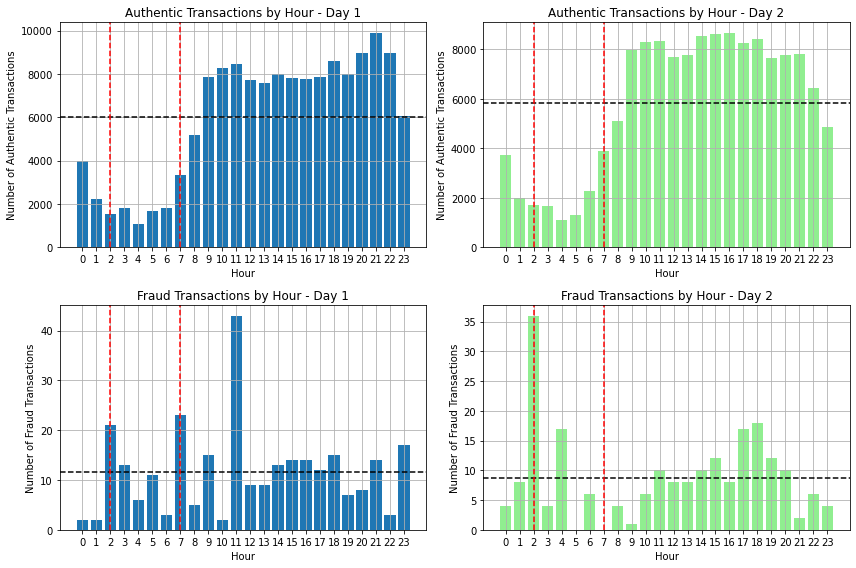

In [39]:

# Calcular la media de las transacciones auténticas y fraudulentas para ambos días
authentic_mean_day1 = total_day_1['Authentic'].mean()
fraud_mean_day1 = total_day_1['Fraud'].mean()
authentic_mean_day2 = total_day_2['Authentic'].mean()
fraud_mean_day2 = total_day_2['Fraud'].mean()

# Crear una figura con un grid de 2 por 2
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico para operaciones auténticas - Day 1
axes[0, 0].bar(total_day_1['Hour'], total_day_1['Authentic'])
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Number of Authentic Transactions')
axes[0, 0].set_title('Authentic Transactions by Hour - Day 1')
axes[0, 0].set_xticks(np.arange(24))
axes[0, 0].grid(True)
axes[0, 0].axhline(y=authentic_mean_day1, color='black', linestyle='--')  # Línea horizontal en el valor de la media

# Agregar líneas verticales en las barras 2 y 7 del gráfico de operaciones fraudulentas - Day 1
axes[0, 0].axvline(x=2, color='red', linestyle='--')  # Línea vertical en la posición de la barra 2
axes[0, 0].axvline(x=7, color='red', linestyle='--')  # Línea vertical en la posición de la barra 7


# Gráfico para operaciones fraudulentas - Day 1
axes[1, 0].bar(total_day_1['Hour'], total_day_1['Fraud'])
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Number of Fraud Transactions')
axes[1, 0].set_title('Fraud Transactions by Hour - Day 1')
axes[1, 0].set_xticks(np.arange(24))
axes[1, 0].grid(True)
axes[1, 0].axhline(y=fraud_mean_day1, color='black', linestyle='--')  # Línea horizontal en el valor de la media

# Agregar líneas verticales en las barras 2 y 7 del gráfico de operaciones fraudulentas - Day 1
axes[1, 0].axvline(x=2, color='red', linestyle='--')  # Línea vertical en la posición de la barra 2
axes[1, 0].axvline(x=7, color='red', linestyle='--')  # Línea vertical en la posición de la barra 7

# Gráfico para operaciones auténticas - Day 2
axes[0, 1].bar(total_day_2['Hour'], total_day_2['Authentic'], color='lightgreen') 
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('Number of Authentic Transactions')
axes[0, 1].set_title('Authentic Transactions by Hour - Day 2')
axes[0, 1].set_xticks(np.arange(24))
axes[0, 1].grid(True)
axes[0, 1].axhline(y=authentic_mean_day2, color='black', linestyle='--')  # Línea horizontal en el valor de la media

# Agregar líneas verticales en las barras 2 y 7 del gráfico de operaciones fraudulentas - Day 1
axes[0, 1].axvline(x=2, color='red', linestyle='--')  # Línea vertical en la posición de la barra 2
axes[0, 1].axvline(x=7, color='red', linestyle='--')  # Línea vertical en la posición de la barra 7


# Gráfico para operaciones fraudulentas - Day 2
axes[1, 1].bar(total_day_2['Hour'], total_day_2['Fraud'], color='lightgreen') 
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_ylabel('Number of Fraud Transactions')
axes[1, 1].set_title('Fraud Transactions by Hour - Day 2')
axes[1, 1].set_xticks(np.arange(24))
axes[1, 1].grid(True)
axes[1, 1].axhline(y=fraud_mean_day2, color='black', linestyle='--')  # Línea horizontal en el valor de la media

# Agregar líneas verticales en las barras 2 y 7 del gráfico de operaciones fraudulentas - Day 2
axes[1, 1].axvline(x=2, color='red', linestyle='--')  # Línea vertical en la posición de la barra 2
axes[1, 1].axvline(x=7, color='red', linestyle='--')  # Línea vertical en la posición de la barra 7

plt.tight_layout()
plt.show()


## Variable caracterististicas V1-V28

<AxesSubplot:>

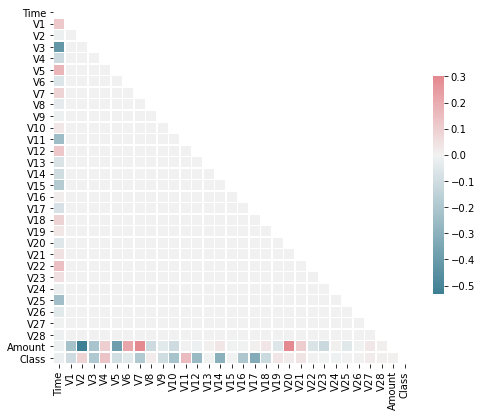

In [40]:
# Generamos matriz

# Generate a mask for the upper triangle
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Las 3 clases con mayor correlacion son: v17,v14 y v12 y ninguna supera el 0.35.

In [41]:
#Top 3 Features
correlations = corr['Class'].abs().sort_values(ascending = False).to_frame().query('Class < 1')
correlations.iloc[0:3]

,Class
V17,0.326481
V14,0.302544
V12,0.260593


# Variable Amount

La mayoria de las transacciones se encuentran entre 0 y 3000. si bien hay outliers bastante extremos. En principio no se borraran.

Entre las operaciones genuinas vemos como casi la mitad son de 22 um o menos , y el 75% alrededor de los 105um siendo la maxima de 25691.16 um.

Entre las operaciones fraudulentas vemos como casi la mitad son de menos de 10 um, y el 75% alrededor de los 77um siendo la maxima de 2125.87um.

Las operaciones fraudulentas son significativamente mas pequeñas,casi la mitad. Hay outliers bastante extremos entre las genuinas y en principio no se borraran.

Hay que mencionar que las 27 operaciones de valor 0, son para verificaciones de identidad por parte de la entidad emisora para validar operaciones, no son erroneas.


In [42]:
print("Genuine Transaction distribution : \n",df[(df['Class'] == 0)]['Amount'].value_counts().head())
print("\n")
print("Maximum amount of Genuine transaction - ",df[(df['Class'] == 0)]['Amount'].max())
print("Minimum amount of Genuine transaction - ",df[(df['Class'] == 0)]['Amount'].min())

df_describe_0 = (df['Amount'][df['Class']== 0]).describe()
print('\n\n Genuine Transaction distribution describe:')
df_describe_0

Genuine Transaction distribution : 
 1.00     13575
1.98      6044
0.89      4872
9.99      4746
15.00     3280
Name: Amount, dtype: int64


Maximum amount of Genuine transaction -  25691.16
Minimum amount of Genuine transaction -  0.0


 Genuine Transaction distribution describe:


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [43]:
print("Fraud Transaction distribution : \n",df[(df['Class'] == 1)]['Amount'].value_counts().head())
print("\n")
print("Maximum amount of fraud transaction - ",df[(df['Class'] == 1)]['Amount'].max())
print("Minimum amount of fraud transaction - ",df[(df['Class'] == 1)]['Amount'].min())

df_describe_1 = (df['Amount'][df['Class']== 1]).describe()
print('\n\n Fraud Transaction distribution describe:')
df_describe_1

Fraud Transaction distribution : 
 1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: Amount, dtype: int64


Maximum amount of fraud transaction -  2125.87
Minimum amount of fraud transaction -  0.0


 Fraud Transaction distribution describe:


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

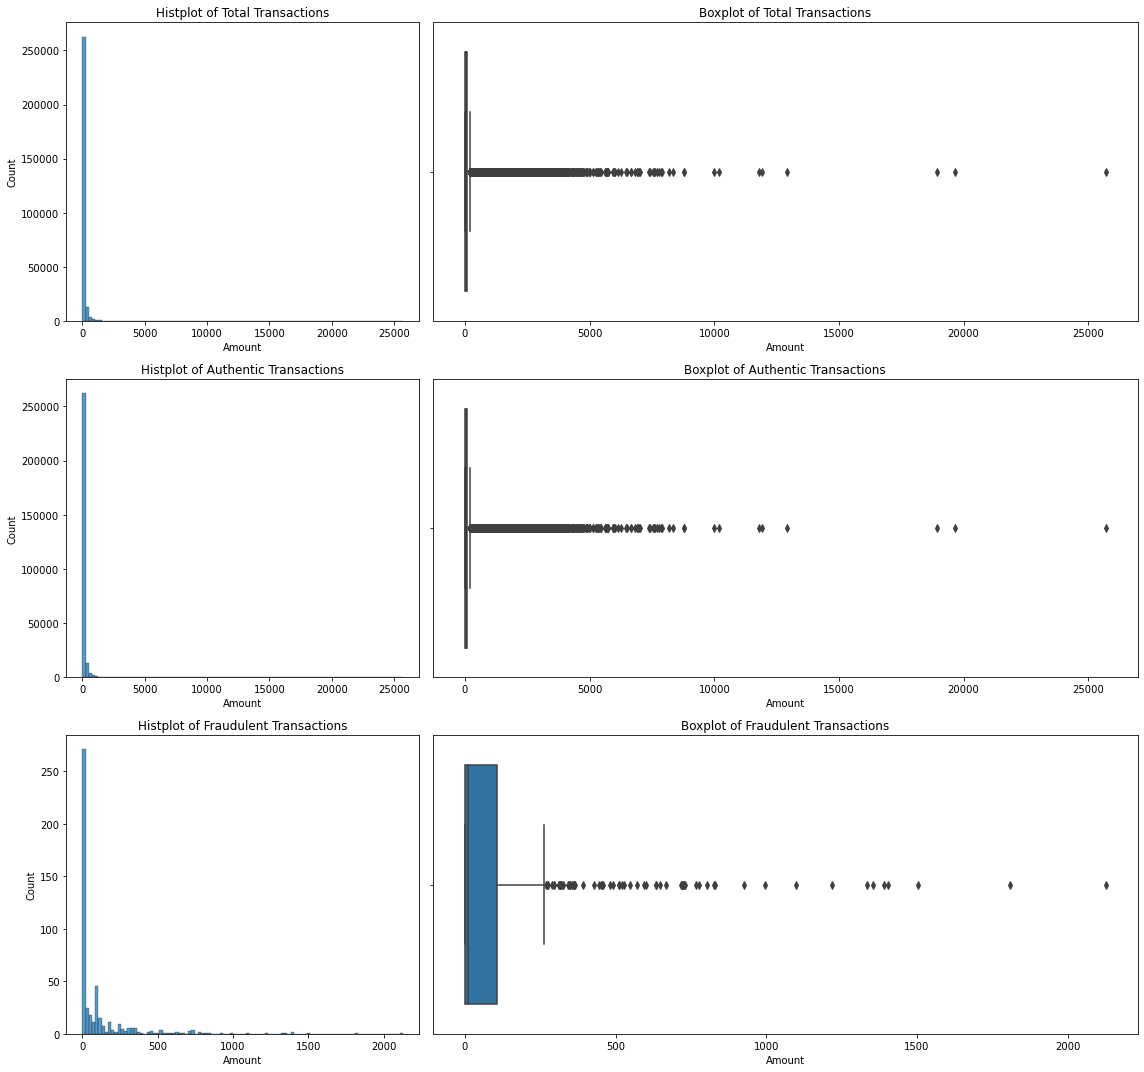

In [44]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 15), gridspec_kw={'width_ratios': [1, 2]})

# Total Transactions
sns.histplot(df['Amount'], bins=100, ax=axes[0, 0])
axes[0, 0].set_title("Histplot of Total Transactions")

sns.boxplot(df['Amount'], orient='horizontal', ax=axes[0, 1])
axes[0, 1].set_title("Boxplot of Total Transactions")

# Authentic Transactions
sns.histplot(df[df['Class'] == 0]['Amount'], bins=100, ax=axes[1, 0])
axes[1, 0].set_title("Histplot of Authentic Transactions")

sns.boxplot(df['Amount'][df['Class'] == 0], orient='horizontal', ax=axes[1, 1])
axes[1, 1].set_title("Boxplot of Authentic Transactions")

# Fraudulent Transactions
sns.histplot(df[df['Class'] == 1]['Amount'], bins=100, ax=axes[2, 0])
axes[2, 0].set_title("Histplot of Fraudulent Transactions")

sns.boxplot(df['Amount'][df['Class'] == 1], orient='horizontal', ax=axes[2, 1])
axes[2, 1].set_title("Boxplot of Fraudulent Transactions")

plt.tight_layout()
plt.show()

# Variable Class

In [45]:
### FRAUDULENTAS

# Convertir la columna 'Time' a horas y crear la columna 'DayHour'
fraudulentas = df.loc[df['Class'] == 1, ['Time', 'Amount']].copy()
fraudulentas['Time'] = fraudulentas['Time'] / 3600
fraudulentas['Day'] = fraudulentas['Time'] // 24
fraudulentas['Day'] = fraudulentas['Day'].astype(int) + 1  # Cambiar la etiqueta del primer día
fraudulentas['Hour'] = fraudulentas['Time'] % 24
fraudulentas['Hour'] = fraudulentas['Hour'].astype(int).astype(str).str.zfill(2)
fraudulentas['DayHour'] = fraudulentas['Day'].astype(int).astype(str) + '-' + fraudulentas['Hour']

# Calcular la suma, el conteo y el importe medio de 'Amount' para cada 'DayHour'
fraudulentas = fraudulentas.groupby('DayHour')['Amount'].agg(['sum', 'size']).reset_index()
fraudulentas.columns = ['DayHour', 'TotFraud', 'NFraud']
fraudulentas['FraudAvg'] = round(fraudulentas['TotFraud'] / fraudulentas['NFraud'],2)

# Ordenar el resultado por 'DayHour'
fraudulentas = fraudulentas.sort_values('DayHour')

### AUTENTICAS

# Convertir la columna 'Time' a horas y crear la columna 'DayHour'
autenticas = df.loc[df['Class'] == 0, ['Time', 'Amount']].copy()
autenticas['Time'] = autenticas['Time'] / 3600
autenticas['Day'] = autenticas['Time'] // 24
autenticas['Day'] = autenticas['Day'].astype(int) + 1  # Cambiar la etiqueta del primer día
autenticas['Hour'] = autenticas['Time'] % 24
autenticas['Hour'] = autenticas['Hour'].astype(int).astype(str).str.zfill(2)
autenticas['DayHour'] = autenticas['Day'].astype(int).astype(str) + '-' + autenticas['Hour']

# Calcular la suma, el conteo y el importe medio de 'Amount' para cada 'DayHour'
autenticas = autenticas.groupby('DayHour')['Amount'].agg(['sum', 'size']).reset_index()
autenticas.columns = ['DayHour', 'TotAuth', 'NAuth']
autenticas['AuthAvg'] = round(autenticas['TotAuth'] / autenticas['NAuth'], 2)

# Ordenar el resultado por 'DayHour'
autenticas = autenticas.sort_values('DayHour')

# UNIMOS AUTENTICAS Y FRAUDULENTAS
amount_hour_total = pd.concat([autenticas.set_index('DayHour'), fraudulentas.set_index('DayHour')], axis=1)
amount_hour_total = amount_hour_total.fillna(0)
amount_hour_total = amount_hour_total.reset_index()

# SEPARAMOS POR DIA

amount_hour_total_day_1  = amount_hour_total.loc[:23]
amount_hour_total_day_2  = amount_hour_total.loc[24:]

amount_hour_total_day_2 = amount_hour_total_day_2 .reset_index()

# Combinar los DataFrames horizontalmente
df_combined2 = pd.concat([amount_hour_total_day_1, amount_hour_total_day_2], axis=1)



# Crear una línea de división entre el día 1 y el día 2
df_combined2.insert(len(amount_hour_total_day_1.columns), '#', '#')
df_combined2.drop(( 'index'), axis=1, inplace=True)
df_combined2

,DayHour,TotAuth,NAuth,AuthAvg,TotFraud,NFraud,FraudAvg,#,DayHour,TotAuth,NAuth,AuthAvg,TotFraud,NFraud,FraudAvg
0,1-00,256572.87,3961,64.77,529.00,2.0,264.50,#,2-00,205815.32,3728,55.21,1291.07,4.0,322.77
1,1-01,145806.76,2215,65.83,298.93,2.0,149.46,#,2-01,117239.37,1995,58.77,980.39,8.0,122.55
2,1-02,106989.39,1555,68.80,1829.78,21.0,87.13,#,2-02,122313.31,1716,71.28,2688.20,36.0,74.67
3,1-03,94086.79,1808,52.04,220.05,13.0,16.93,#,2-03,87531.46,1667,52.51,13.86,4.0,3.46
4,1-04,79050.36,1076,73.47,790.26,6.0,131.71,#,2-04,89580.67,1110,80.70,757.94,17.0,44.58
5,1-05,75709.25,1670,45.33,1416.67,11.0,128.79,#,2-05,74394.26,1309,56.83,0.00,0.0,0.00
6,1-06,142299.38,1828,77.84,104.11,3.0,34.70,#,2-06,123505.50,2264,54.55,903.21,6.0,150.54
7,1-07,270548.20,3345,80.88,2757.78,23.0,119.90,#,2-07,217903.12,3875,56.23,0.00,0.0,0.00
8,1-08,469638.61,5174,90.77,137.15,5.0,27.43,#,2-08,442143.69,5093,86.81,293.84,4.0,73.46
9,1-09,800360.93,7863,101.79,1110.79,15.0,74.05,#,2-09,827213.48,7959,103.93,144.62,1.0,144.62


In [46]:
amount_hour_total_fraud_avg = round(amount_hour_total['FraudAvg'].mean(),2)
amount_hour_total_authentic_avg = round(amount_hour_total['AuthAvg'].mean(),2)
amount_hour_total_avg = round( (amount_hour_total_fraud_avg+ amount_hour_total_authentic_avg)/2,2)

print('Media operacion fraudulenta: {}'.format(amount_hour_total_fraud_avg))
print('Media operacion legitima:     {}'.format(amount_hour_total_authentic_avg))
print('------------------------------------')
print('Media operacion:             {}'.format(amount_hour_total_avg))

Media operacion fraudulenta: 124.18
Media operacion legitima:     82.08
------------------------------------
Media operacion:             103.13


**Implementando algun sistema de verificacion para operaciones de >=100 euros podriamos controlar la mitad de las fraudulentas**

# Separacion del Dataset

Por ultimo se procede a prepara el dataset para comenzar a ejecutar los algoritmos.

In [47]:
df = df.drop("Time", axis = 1)

y= df["Class"]
X = df.drop("Class", axis = 1)
y.shape,X.shape

((284807,), (284807, 29))

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [49]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [50]:
# Comprobacion composicion dataset
print("Fraudulent Count for Train data : ",np.sum(y_train))
print("Fraudulent Count for Test data  :  ",np.sum(y_test))
print("Fraudulent Count for Full data  : ",np.sum(y))

Fraudulent Count for Train data :  394
Fraudulent Count for Test data  :   98
Fraudulent Count for Full data  :  492
